### Dataset link
https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
pd.set_option('display.max_columns',1000)

In [3]:
df = pd.read_csv("spam.csv",encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],inplace=True)
df.columns = ['label','message']

In [6]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.shape

(5572, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

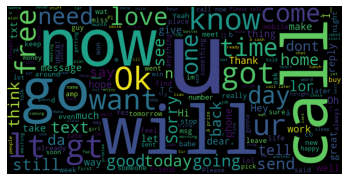

In [11]:
words = " ".join(df.message)
wc = WordCloud(width=800,height=400).generate(words)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [12]:
#nltk.download('stopwords')

In [13]:
stop = stopwords.words('english')
len(stop)

179

In [14]:
stop.remove("not")
len(stop)

178

In [15]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [16]:
ps = PorterStemmer()
message = []
for i in df.message:
    msg = re.sub("[^a-zA-Z]"," ",i).lower().split()
    msg = " ".join(ps.stem(i) for i in msg if not i in stop)
    message.append(msg)

### Bag Of Words

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(message).toarray()
X = pd.DataFrame(X)
X.columns = cv.get_feature_names()
X.head()

,aathi,abi,abiola,abl,abt,ac,acc,accept,access,accid,accident,accordingli,account,ach,across,act,action,activ,actual,ad,add,addi,addict,address,admir,ador,adult,advanc,advic,advis,ae,affair,affect,afraid,aft,afternoon,aftr,age,ago,ah,aha,ahead,ahmad,aight,aint,air,airport,aiya,aiyah,aiyar,aiyo,al,alert,alex,allah,allow,almost,alon,along,alreadi,alright,alrit,also,alway,amaz,ami,among,amount,amp,amt,an,angri,announc,anoth,ansr,answer,anti,anybodi,anymor,anyon,anyth,anythin,anytim,anyway,anywher,apart,apologis,app,appar,appli,appoint,appreci,appt,april,ar,arcad,ard,area,argh,argu,argument,arm,armand,arng,around,arrang,arrest,arriv,arsen,art,arun,asap,ask,askd,askin,asleep,ass,assum,ate,atlanta,atm,attach,attempt,attend,attract,auction,audit,august,aunt,aunti,auto,avail,avatar,ave,avent,avoid,await,awak,award,away,awesom,babe,babi,back,bad,bag,bahama,bak,balanc,bank,bar,bare,basic,bath,batteri,bay,bb,bcm,bcoz,bcum,bday,bear,beauti,becom,becoz,bed,bedroom,beer,befor,beg,begin,behind,believ,belli,belovd,best,bet,better,bf,bid,big,biggest,bill,bin,bird,birthday,bishan,bit,bitch,bite,biz,black,blackberri,blank,bless,bloke,blood,bloodi,bloomberg,blow,blue,bluetooth,bodi,bold,bonu,boo,book,boost,bore,born,boss,boston,bother,bought,bout,bowl,box,boy,boytoy,brain,brand,break,breath,bright,brilliant,bring,bro,broke,brother,brought,bslvyl,bt,btw,bu,buck,bud,budget,bugi,build,bun,burn,busi,butt,buy,buzi,buzz,bx,bye,cabin,cafe,cake,cal,calcul,calicut,california,call,callback,callcost,caller,callertun,callin,cam,camcord,came,camera,campu,cancel,cancer,cann,cannot,cant,captain,car,card,cardiff,care,career,carlo,carri,cartoon,case,cash,cat,catch,caught,caus,cbe,cc,cd,celeb,celebr,cell,center,centr,certainli,cha,chain,challeng,chanc,chang,channel,charact,charg,chariti,chart,chase,chat,cheap,cheaper,cheat,chechi,check,cheer,chennai,chicken,chikku,child,childish,children,chill,chillin,china,chines,choic,choos,chosen,christma,church,cine,cinema,citi,citizen,claim,clair,class,clean,clear,click,clo,clock,close,closer,cloth,club,cm,cn,co,cock,code,coffe,coin,cold,colleagu,collect,colleg,colour,com,combin,come,comedi,comin,common,commun,comp,compani,competit,complet,complimentari,comput,comuk,concentr,concert,condit,confid,confirm,confus,congrat,congratul,connect,consid,contact,content,contract,convey,convinc,cook,cool,copi,correct,cost,costa,could,countri,coupl,cours,cover,coz,cr,crash,crave,crazi,cream,creat,credit,cri,cross,croydon,cs,cud,cuddl,cum,cup,current,cust,custcar,custom,cut,cute,cuz,cw,da,dad,daddi,daili,damn,danc,dare,dark,darl,darlin,darren,dat,date,day,de,dead,deal,dear,decemb,decid,decim,decis,dedic,deep,def,definit,del,delet,deliv,deliveri,dem,den,deni,depend,derek,detail,develop,dey,di,dictionari,didnt,die,diet,differ,difficult,digit,din,dine,dinner,dint,direct,directli,dirti,discount,discuss,disturb,dload,dnt,doc,doctor,doesnt,dog,doin,dollar,done,dont,door,doubl,download,draw,dream,dress,dri,drink,drive,drivin,drop,drug,dude,due,...,serv,servic,set,settl,sex,sexi,sha,shall,shame,share,shd,sheet,ship,shirt,shit,shock,shoot,shop,short,shortli,shout,show,shower,shuhui,si,sick,side,sigh,sight,sign,silent,sim,simpl,simpli,sinc,sing,singl,sipix,sir,sister,sit,site,situat,six,sk,skilgm,sky,skype,slave,sleep,slept,slow,slowli,sm,small,smart,smash,smile,smoke,smth,sn,snake,snow,social,sofa,soft,softwar,sol,solv,somebodi,someon,someth,somethin,sometim,somewher,song,soni,sonyericsson,soon,sooner,sore,sori,sorri,sorrow,sort,soryda,sound,soup,sourc,south,sp,space,spanish,spare,speak,special,speechless,speed,spell,spend,spent,spk,spl,spoil,spoke,spoken,spook,sport,spree,spring,sri,ss,st,staff,stamp,stand,standard,star,start,starwar,statement,station,stay,std,step,still,stock,stockport,stomach,stomp,stone,stop,stoptxt,store,stori,storm,str,straight,stranger,street,stress,strike,strong,stuck,student,studi,stuff,stupid,style,stylish,sub,subpoli,subscrib,subscript,success,suck,suffer,sugar,suggest,suit,sum,summer,sun,sunday,sunni,sunshin,suntec,sup,

### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,df.label,test_size=0.25,stratify=df.label,random_state=0)

In [19]:
X_train.shape,y_train.shape

((4179, 2000), (4179,))

In [20]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test),model.score(X_train,y_train)

(0.9770279971284996, 0.9882747068676717)

In [21]:
pred = model.predict(X_test)

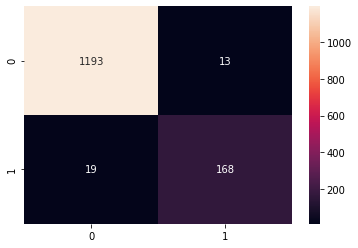

In [22]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt='.5g')
plt.show()

### TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(message).toarray()
X = pd.DataFrame(X)
X.columns = tfidf.get_feature_names()
X.head()

,aah,aathi,abi,abiola,abl,abt,abta,ac,acc,accept,access,accid,accident,accomod,accordingli,account,ach,acl,aco,across,act,action,activ,actor,actual,ad,adam,add,addamsfa,addi,addict,address,admin,administr,admir,admit,ador,adult,advanc,adventur,advic,advis,ae,affair,affect,afraid,aft,afternoon,aftr,age,ago,ah,aha,ahead,ahmad,aight,aint,air,airport,aiya,aiyah,aiyar,aiyo,al,album,alcohol,alert,alex,alfi,algarv,ali,aliv,allah,allow,almost,alon,along,alreadi,alright,alrit,also,although,alway,alwi,amaz,american,ami,amma,among,amongst,amount,amp,amt,amus,an,andr,andro,angri,anim,anna,anni,anniversari,announc,annoy,anot,anoth,ansr,answer,anthoni,anti,anybodi,anymor,anyon,anyth,anythin,anytim,anyway,anywher,aom,apart,apo,apolog,apologis,app,appar,appl,applebe,appli,applic,appoint,appreci,approach,approv,approx,appt,april,aproach,ar,arcad,ard,area,arent,argh,argu,argument,aris,arm,armand,arng,around,arrang,arrest,arriv,arsen,art,arun,asap,ashley,ask,askd,askin,asleep,asp,ass,assum,ate,atlanta,atlast,atm,attach,attempt,attend,attract,auction,audit,audrey,august,aunt,aunti,auto,av,avail,avatar,ave,avent,avoid,await,awak,award,away,awesom,aww,ayn,ba,babe,babi,babysit,back,bad,bag,bahama,bak,balanc,ball,bang,bank,bar,bare,base,basic,bat,batch,bath,batteri,bay,bb,bbd,bc,bck,bcm,bcoz,bcum,bday,bear,beauti,bec,becom,becoz,bed,bedrm,bedroom,beer,befor,beg,begin,behav,behind,bein,believ,beliv,bell,belli,belong,belov,belovd,ben,beneath,beneficiari,benefit,best,bet,better,bewar,beyond,bf,bhaji,bid,big,bigger,biggest,bill,billion,bin,biola,bird,birla,birth,birthdat,birthday,bishan,bit,bitch,bite,biz,black,blackberri,blah,blake,blame,blank,blanket,bleh,bless,blind,block,blog,bloke,blond,bloo,blood,bloodi,bloomberg,blow,blu,blue,bluetooth,bluff,blur,bmw,boat,bodi,bold,bone,bonu,boo,book,boost,booti,bootydeli,bore,borin,born,borrow,boss,boston,bother,bottl,bottom,bought,bout,bowl,box,boy,boyfriend,boytoy,bp,brah,brain,brand,brandi,bray,bread,break,breath,brief,bright,brilliant,bring,bristol,british,britney,bro,broad,broke,broken,brotha,brother,brought,browni,bruce,bruv,bslvyl,bstfrnd,bt,btw,bu,buck,bud,buddi,budget,buff,buffet,bugi,build,bulb,bun,burger,burn,buse,busi,butt,buy,buzi,buzz,bx,bye,cabin,cafe,cake,cal,calcul,calicut,california,call,callback,callcost,caller,callertun,callin,cam,camcord,came,camera,campu,cancel,cancer,cann,cannot,cant,captain,car,card,cardiff,care,career,carlo,carri,cartoon,case,cash,cat,catch,caught,caus,cbe,cc,cd,celeb,celebr,cell,center,centr,certainli,cha,chain,challeng,chanc,chang,channel,charact,charg,chariti,charl,chart,chase,chat,cheap,cheaper,cheat,chechi,check,cheer,chees,chennai,chest,chg,chicken,chikku,child,childish,children,chill,chillin,china,chines,chip,chocol,choic,choos,chosen,christ,christma,church,cine,cinema,citi,citizen,claim,clair,clark,class,clean,clear,click,clo,clock,close,closer,cloth,club,cm,cn,co,cock,code,coffe,coin,cold,colleagu,collect,colleg,colour,com,combin,come,comedi,comin,commerci,common,commun,...,sure,surf,surpris,survey,sw,sweet,sweetest,sweetheart,sweeti,swim,swing,swiss,switch,swoop,swt,swtheart,symbol,system,ta,tabl,tablet,take,taken,takin,talent,talk,tampa,tape,tariff,tast,tat,taunton,taxi,taylor,tayseer,tb,tc,tcr,tea,teach,teacher,team,tear,teas,tech,technic,tee,teeth,tel,telephon,tell,telli,telphon,telugu,temp,templ,ten,tenant,tenerif,tension,term,terribl,terrif,terrorist,tessi,test,text,textbuddi,textcomp,textoper,textpod,tf,tg,th,thangam,thank,thanksgiv,thanx,that,theatr,theme,themob,theori,there,thesi,thgt,thi,thing,think,thinkin,thk,thm,thnk,tho,thot,though,thought,thousand,thread,threat,three,threw,throat,throw,thru,tht,thur,thursday,thx,ti,tick,ticket,tight,tih,til,till,time,tip,tire,tirunelvali,tirupur,tissco,titl,tiwari,tkt,tlk,tlp,tm,tmr,tnc,toa,toclaim,today,tog,togeth,told,toll,tom,tomarrow,tomeandsaid,tomo,tomorro,tomorrow,ton,tone,tonight,tonit,took,tool,top,topic,torch,tortilla,toshiba,tot,total,touch,tough,tour,toward,town,track,train,transact,transfer,transfr,tra

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,df.label,test_size=0.25,stratify=df.label,random_state=0)

In [25]:
X_train.shape,y_train.shape

((4179, 3000), (4179,))

In [26]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test),model.score(X_train,y_train)

(0.9712849964106246, 0.9844460397224216)

In [27]:
pred = model.predict(X_test)

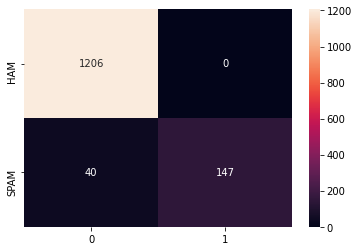

In [28]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt='.5g',yticklabels=['HAM','SPAM'])
plt.show()

### Single Prediction

In [29]:
def spam_classifier(x):
    x = re.sub("[^a-zA-Z]"," ",x).lower().split()
    x = " ".join(ps.stem(i) for i in x if not i in stop)
    x = tfidf.transform([x]).toarray()
    pred = model.predict(x)
    return pred[0]

In [30]:
text = '''
        URGENT! We are trying to contact U Todays draw shows that you have 
        won a £800 prize GUARANTEED. Call 09050000460 from land line. Claim J89. po box245c2150pm
        '''
spam_classifier(text)

'spam'

In [31]:
y_test[y_test=='spam'].index

Int64Index([3826, 3558,  590, 1468, 4196, 2985, 4471, 4723,  730, 3696,
            ...
             239,  504, 2879, 1829,  954, 2063, 4234, 4014, 5537, 1764],
           dtype='int64', length=187)

In [32]:
df['message'][3560]

'Text BANNEDUK to 89555 to see! cost 150p textoperator g696ga 18+ XXX'